<a href="https://colab.research.google.com/github/syedmohsindaniyalhaider/OpenUniversity_dataset_decisiontree/blob/main/Assigment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# !pip install chefboost

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
studAss = pd.read_csv('/content/drive/MyDrive/DE/studentAssessment.csv')
studInfo = pd.read_csv('/content/drive/MyDrive/DE/studentInfo.csv')
studVle = pd.read_csv('/content/drive/MyDrive/DE/studentVle.csv')

In [5]:
studAss.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [6]:
studVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [7]:
studInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [8]:
df1 = studVle
df2 = studAss
df3 = studInfo

In [9]:
df1 = df1.drop(['date', 'id_site','code_module','code_presentation'], axis = 1)
df2 = df2.drop(['date_submitted','is_banked'], axis = 1)
df3 = df3.drop(['code_module','code_presentation','highest_education','imd_band','age_band'], axis = 1)

In [10]:
df1.shape, df2.shape, df3.shape

((10655280, 2), (173912, 3), (32593, 7))

In [11]:
df1.head()

,id_student,sum_click
0,28400,4
1,28400,1
2,28400,1
3,28400,11
4,28400,1


In [12]:
df2.head()

,id_assessment,id_student,score
0,1752,11391,78.0
1,1752,28400,70.0
2,1752,31604,72.0
3,1752,32885,69.0
4,1752,38053,79.0


In [13]:
df3.head()

,id_student,gender,region,num_of_prev_attempts,studied_credits,disability,final_result
0,11391,M,East Anglian Region,0,240,N,Pass
1,28400,F,Scotland,0,60,N,Pass
2,30268,F,North Western Region,0,60,Y,Withdrawn
3,31604,F,South East Region,0,60,N,Pass
4,32885,F,West Midlands Region,0,60,N,Pass


In [14]:
df = df1.merge(df2)

In [15]:
df = df.drop_duplicates()

In [16]:
df = df.dropna()

In [17]:
df = df.merge(df3)

In [18]:
df.shape

(5486939, 10)

In [19]:
df = df.drop_duplicates()

In [20]:
df.shape

(5199277, 10)

In [21]:
df.head(25)

,id_student,sum_click,id_assessment,score,gender,region,num_of_prev_attempts,studied_credits,disability,final_result
0,28400,4,1752,70.0,F,Scotland,0,60,N,Pass
1,28400,4,1753,68.0,F,Scotland,0,60,N,Pass
2,28400,4,1754,70.0,F,Scotland,0,60,N,Pass
3,28400,4,1755,64.0,F,Scotland,0,60,N,Pass
4,28400,4,1756,60.0,F,Scotland,0,60,N,Pass
5,28400,1,1752,70.0,F,Scotland,0,60,N,Pass
6,28400,1,1753,68.0,F,Scotland,0,60,N,Pass
7,28400,1,1754,70.0,F,Scotland,0,60,N,Pass
8,28400,1,1755,64.0,F,Scotland,0,60,N,Pass
9,28400,1,1756,60.0,F,Scotland,0,60,N,Pass


In [22]:
df.studied_credits.value_counts()

60     2748069
120     942813
90      638216
30      487761
150     135738
180     104544
240      24451
75       19870
210      19428
70       17660
100       5697
270       5533
130       5144
45        4768
80        4711
135       4013
160       2868
40        2866
300       2647
360       2484
105       2127
110       2066
140       1909
190       1632
330       1169
195       1155
220        928
145        896
165        829
115        758
85         634
630        594
250        575
170        562
50         489
200        454
430        418
310        392
325        363
280        336
95         330
55         274
235        264
155        224
225        129
420        105
65          96
345         96
255         68
215         54
205         44
355         26
Name: studied_credits, dtype: int64

In [23]:
tbl_df = df[(df['studied_credits']  > 150)]
tbl_df.final_result.value_counts()

Pass           85637
Withdrawn      40493
Fail           31159
Distinction    15083
Name: final_result, dtype: int64

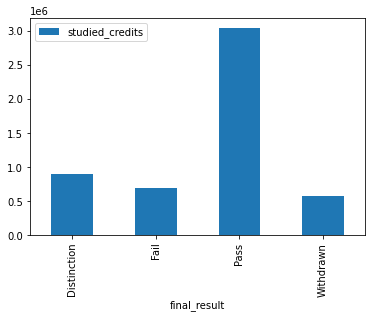

In [24]:
df[['studied_credits', 'final_result']].groupby(by='final_result').count().plot.bar();

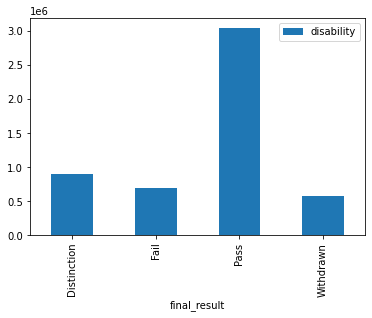

In [25]:
df[['disability', 'final_result']].groupby(by='final_result').count().plot.bar();

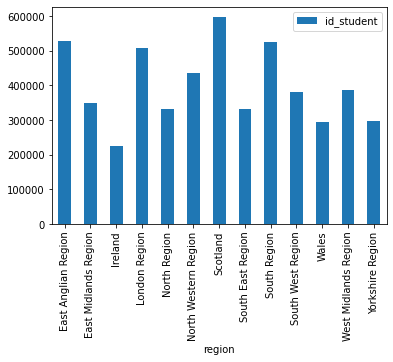

In [26]:
df[['id_student', 'region']].groupby(by='region').count().plot.bar();

In [27]:
new_df = df

In [28]:
dis = pd.get_dummies(df.disability)
gen = pd.get_dummies(df.gender)
res = pd.get_dummies(df.final_result)

In [29]:
df['gender'].value_counts()

M    3359795
F    1839482
Name: gender, dtype: int64

In [30]:
res

,Distinction,Fail,Pass,Withdrawn
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
5486934,0,1,0,0
5486935,0,1,0,0
5486936,0,1,0,0
5486937,0,1,0,0


In [31]:
new_df = new_df.drop(['disability'], axis = 1)
new_df = new_df.drop(['gender'], axis = 1)

In [32]:
df_one = pd.concat((dis,gen,new_df), axis=1)
df_two = df_one.drop(["F"], axis=1)
df_two = df_two.drop(["N"], axis=1)
result_df = df_two.rename(columns={"M": "gender","Y": "disability"})

In [33]:
result_df

,disability,gender,id_student,sum_click,id_assessment,score,region,num_of_prev_attempts,studied_credits,final_result
0,0,0,28400,4,1752,70.0,Scotland,0,60,Pass
1,0,0,28400,4,1753,68.0,Scotland,0,60,Pass
2,0,0,28400,4,1754,70.0,Scotland,0,60,Pass
3,0,0,28400,4,1755,64.0,Scotland,0,60,Pass
4,0,0,28400,4,1756,60.0,Scotland,0,60,Pass
...,...,...,...,...,...,...,...,...,...,...
5486934,0,1,650630,30,37437,55.0,West Midlands Region,0,30,Fail
5486935,0,1,650630,30,37438,80.0,West Midlands Region,0,30,Fail
5486936,0,1,650630,30,37439,60.0,West Midlands Region,0,30,Fail
5486937,0,1,650630,30,37440,60.0,West Midlands Region,0,30,Fail


In [34]:
result_df.describe()

,disability,gender,id_student,sum_click,id_assessment,score,num_of_prev_attempts,studied_credits
count,5.199277e+06,5.199277e+06,5.199277e+06,5.199277e+06,5.199277e+06,5.199277e+06,5.199277e+06,5.199277e+06
mean,8.859809e-02,6.462043e-01,7.135371e+05,2.381395e+01,2.871367e+04,7.693723e+01,1.518436e-01,7.921685e+01
std,2.841628e-01,4.781468e-01,5.558667e+05,3.368373e+01,7.830699e+03,1.801132e+01,4.511846e-01,3.831003e+01
min,0.000000e+00,0.000000e+00,6.516000e+03,1.000000e+00,1.752000e+03,0.000000e+00,0.000000e+00,3.000000e+01
25%,0.000000e+00,0.000000e+00,5.117620e+05,7.000000e+00,2.429500e+04,6.800000e+01,0.000000e+00,6.000000e+01
50%,0.000000e+00,1.000000e+00,5.865940e+05,1.500000e+01,3.486000e+04,8.000000e+01,0.000000e+00,6.000000e+01
75%,0.000000e+00,1.000000e+00,6.344720e+05,3.000000e+01,3.488900e+04,9.000000e+01,0.000000e+00,9.000000e+01
max,1.000000e+00,1.000000e+00,2.698588e+06,6.977000e+03,3.744300e+04,1.000000e+02,6.000000e+00,6.300000e+02


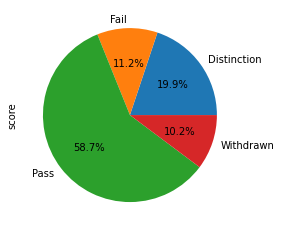

In [35]:
data = result_df.groupby("final_result")["score"].sum()
data.plot.pie(autopct="%.1f%%");

In [36]:
X = result_df.drop(['final_result'], axis = 1)
X = X.drop(['region'], axis = 1)
X = X.drop(['id_student'], axis = 1)
X = X.drop(['id_assessment'], axis = 1)
y = result_df['final_result']
new_y = y

In [37]:
X

,disability,gender,sum_click,score,num_of_prev_attempts,studied_credits
0,0,0,4,70.0,0,60
1,0,0,4,68.0,0,60
2,0,0,4,70.0,0,60
3,0,0,4,64.0,0,60
4,0,0,4,60.0,0,60
...,...,...,...,...,...,...
5486934,0,1,30,55.0,0,30
5486935,0,1,30,80.0,0,30
5486936,0,1,30,60.0,0,30
5486937,0,1,30,60.0,0,30


In [38]:
y.value_counts()

Pass           3041915
Distinction     895327
Fail            686225
Withdrawn       575810
Name: final_result, dtype: int64

In [39]:
y = y.replace('Pass', 1)
y = y.replace('Fail', 0)
y = y.replace('Distinction', 2)
y = y.replace('Withdrawn', 3)

In [40]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: final_result, dtype: int64

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import tree, metrics
from sklearn.naive_bayes import GaussianNB

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size=0.3, random_state = 56)

In [66]:
X1_test = X_test
X1_train = X_train

In [67]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

In [68]:
X1_train

,disability,gender,sum_click,score,num_of_prev_attempts,studied_credits
3535417,0,1,65,44.0,0,60
315769,1,0,2,59.0,3,120
49597,0,1,30,65.0,0,60
3454475,0,1,31,85.0,0,60
1401167,0,1,24,78.0,0,60
...,...,...,...,...,...,...
473667,0,0,10,71.0,0,60
4284823,0,1,40,80.0,0,90
4917288,0,0,23,100.0,0,120
4113076,0,1,71,70.0,1,120


In [69]:
X11_train = scaler1.fit_transform(X1_train)
X11_test=scaler1.transform(X1_test)

In [70]:
X11_train

array([[-0.31160279,  0.73996592,  1.21055513, -1.82851861, -0.33655288,
        -0.50151517],
       [ 3.20921388, -1.3514136 , -0.64082574, -0.99572269,  6.30981797,
         1.06493293],
       [-0.31160279,  0.73996592,  0.18201021, -0.66260432, -0.33655288,
        -0.50151517],
       ...,
       [-0.31160279, -1.3514136 , -0.02369878,  1.28058615, -0.33655288,
         1.06493293],
       [-0.31160279,  0.73996592,  1.38687712, -0.38500568,  1.87890407,
         1.06493293],
       [-0.31160279, -1.3514136 ,  0.03507522,  0.61434942, -0.33655288,
        -1.28473922]])

In [88]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X11_train, y_train)

In [89]:
# plt.figure(figsize=(15,15))
# tree.plot_tree(clf)

In [90]:
result_dt1=clf.predict(X11_test)

In [91]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, result_dt1))

Accuracy: 0.5962235796751345


In [75]:
print(confusion_matrix(y_test,result_dt1))
print("\n")
print(classification_report(y_test,result_dt1))

[[ 36644    736 231126      8]
 [  3648  21185 179605   1585]
 [ 35782  18060 857058   1462]
 [  9447  12341 149314   1783]]


              precision    recall  f1-score   support

 Distinction       0.43      0.14      0.21    268514
        Fail       0.40      0.10      0.16    206023
        Pass       0.60      0.94      0.74    912362
   Withdrawn       0.37      0.01      0.02    172885

    accuracy                           0.59   1559784
   macro avg       0.45      0.30      0.28   1559784
weighted avg       0.52      0.59      0.49   1559784



In [54]:
# config = {'algorithm': 'C4.5'}
# model = chef.fit(c4_df.copy(), config)

In [56]:
gnb = GaussianNB()
y_pred = gnb.fit(X11_train, y_train).predict(X11_test)

In [57]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5139814230688352


In [59]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1559784 points : 758084
